# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [1]:
import pandas as pd
import importlib
# importlib.reload(myutils)
import seaborn as sns
import matplotlib.pyplot as plt


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

In [2]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


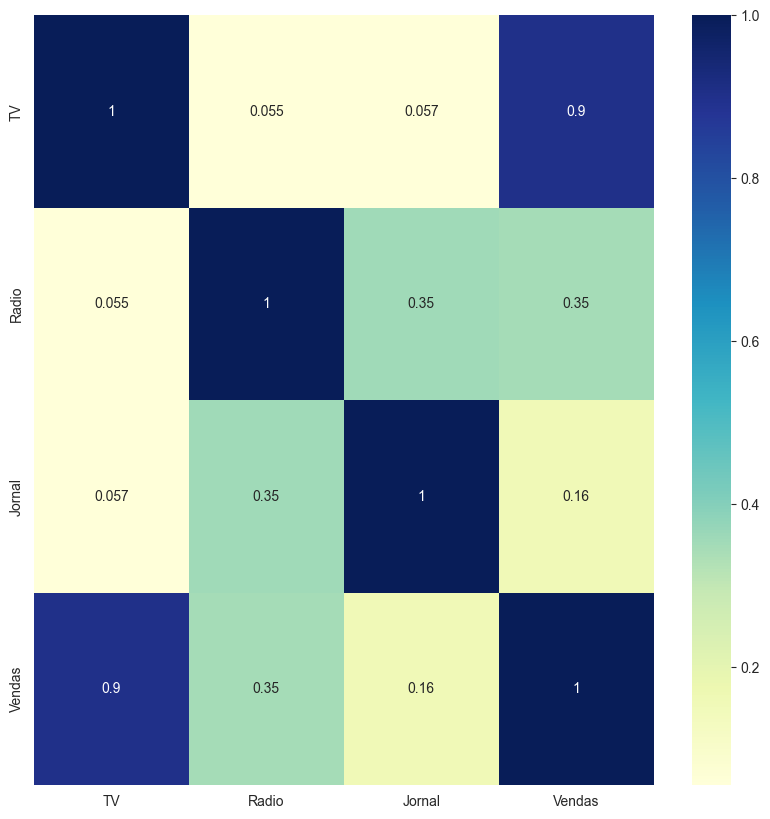

In [3]:
# criar

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='YlGnBu',annot=True)
# exibir
plt.show()

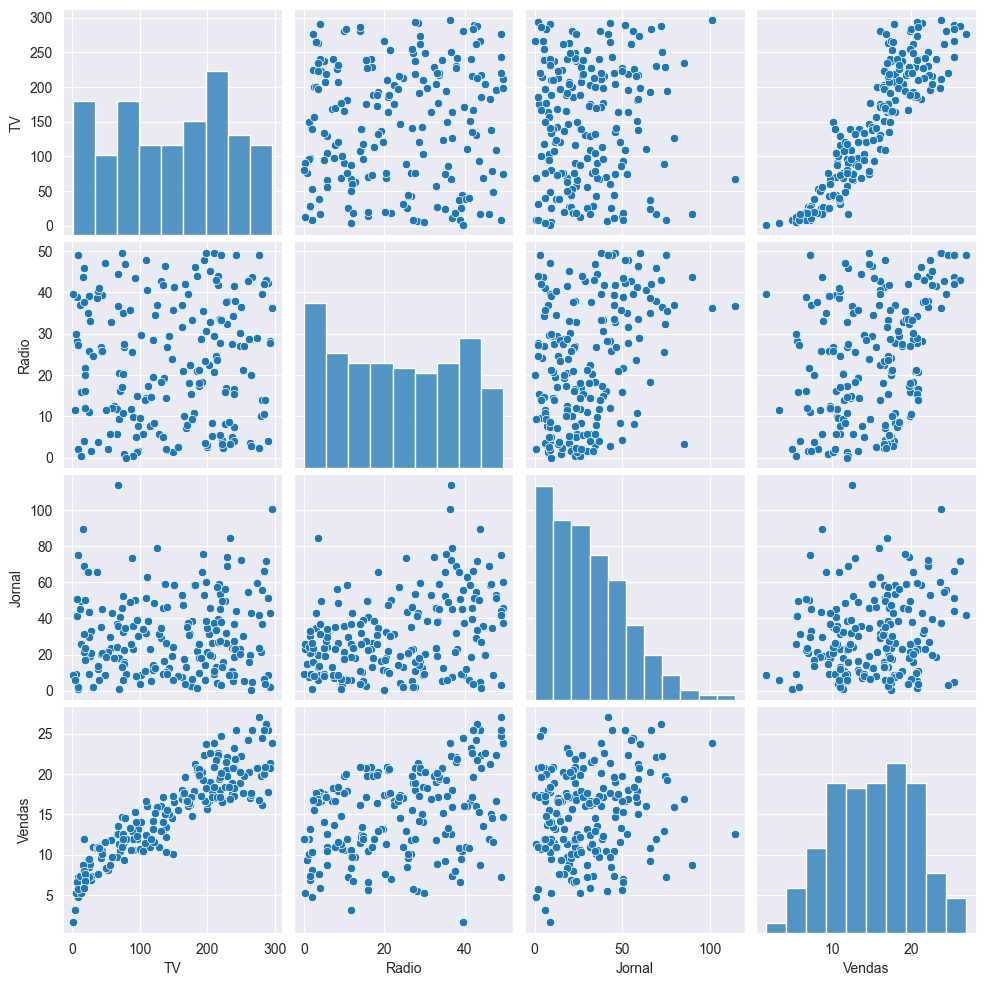

In [4]:
sns.pairplot(df)
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [5]:
X = df[['TV', 'Radio', 'Jornal']]
y = df['Vendas']


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
display(X_test)


,TV,Radio,Jornal
116,139.2,14.3,25.6
67,139.3,14.5,10.2
78,5.4,29.9,9.4
42,293.6,27.7,1.8
17,281.4,39.6,55.8
...,...,...,...
133,219.8,33.5,45.1
137,273.7,28.9,59.7
72,26.8,33.0,19.3
140,73.4,17.0,12.9


In [ ]:
y_test

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [7]:
# importa ela
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# cria ela
lr = LinearRegression()
rf = RandomForestRegressor()

# treina ela
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

# prediz ela
lr_predictions = lr.predict(X_test)
rf_predictions = rf.predict(X_test)

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [8]:
print(r2_score(y_test, lr_predictions))
print(r2_score(y_test, rf_predictions))

0.9071151423684273
0.9644431248424596


In [26]:
rf.feature_importances_

array([0.85360137, 0.12995144, 0.01644719])

#### Visualização Gráfica das Previsões

Comparação do y_true com o y_pred de LinearRegression e RandomForest


,Real,Previsão LR,Previsão RF
58,23.8,21.288161,23.214
40,16.6,18.042132,17.949
34,11.9,10.059590,12.599
102,19.8,21.082241,18.162
184,17.6,20.764760,20.290
198,25.5,24.471874,24.894
95,16.9,16.806436,16.755
4,17.9,15.628857,16.487
29,10.5,10.124799,10.857
168,17.1,18.846019,18.144


,LR,RF
R²,0.907115,0.964443


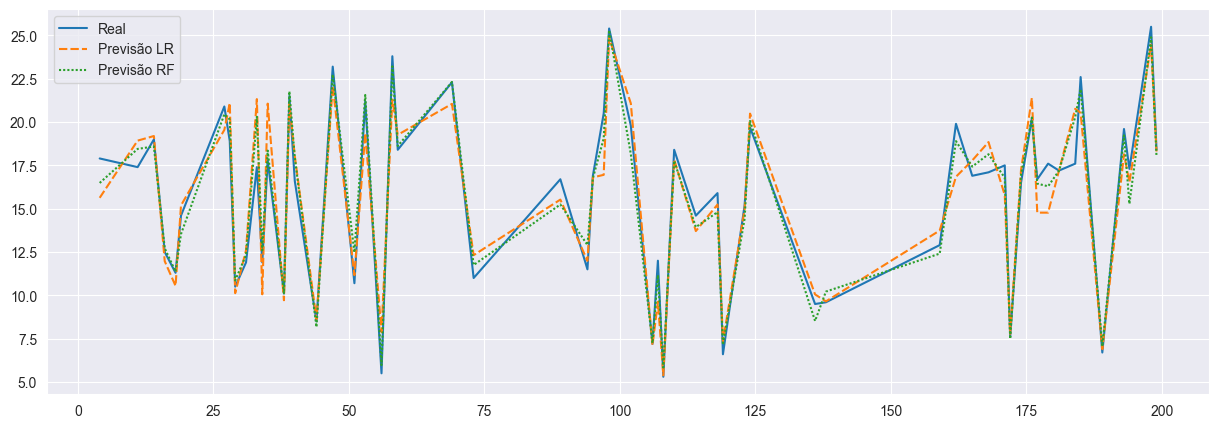

Importância de cada variável para predição


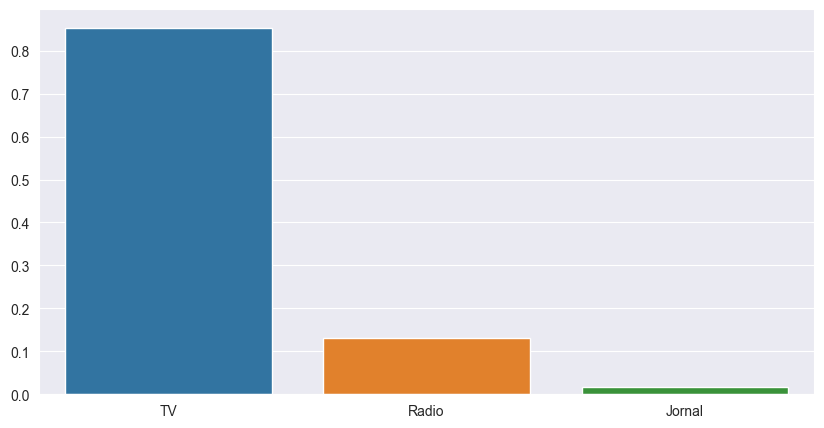

In [9]:

print("Comparação do y_true com o y_pred de LinearRegression e RandomForest")
comparison = pd.DataFrame({'Real': y_test, 'Previsão LR': lr_predictions, 'Previsão RF': rf_predictions})
display(comparison)

metrics = pd.DataFrame({'LR': r2_score(y_test, lr_predictions), 'RF': r2_score(y_test, rf_predictions)}, index=['R²'])
display(metrics)

plt.figure(figsize=(15,5))
sns.lineplot(data=comparison)
plt.show()

# importancia de cada variavel para predição
print("Importância de cada variável para predição")
plt.figure(figsize=(10,5))
sns.barplot(x=X_train.columns, y=rf.feature_importances_)
plt.show()




In [10]:
df_nova = pd.read_csv('novos.csv')
display(df_nova)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [11]:
df

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Como fazer uma nova previsão?

In [12]:
lr_predictions_new = lr.predict(df_nova)
rf_predictions_new = rf.predict(df_nova)

In [13]:
rf_predictions

array([23.214, 17.949, 12.599, 18.162, 20.29 , 24.894, 16.755, 16.487,
       10.857, 18.144, 16.783, 11.368, 18.451, 15.243, 17.762, 14.804,
       12.408, 18.352,  8.523, 18.619, 12.48 , 12.719,  8.173, 12.904,
       12.323, 18.9  , 10.13 , 20.148, 19.231, 20.454, 22.746, 17.429,
       15.278, 16.446, 20.262, 19.055, 16.955, 11.751, 22.315,  7.491,
        5.835, 11.173,  7.064, 18.593,  5.975, 13.535, 13.937, 21.773,
       21.898, 20.066, 25.299, 14.424,  7.139, 21.564, 20.307, 16.294,
       17.188,  7.244, 18.014, 10.217])

In [14]:
comparison = pd.DataFrame({'Previsão LR': lr_predictions_new, 'Previsão RF': rf_predictions_new})
comparison

# adicionar as colunas Tv, Radio e Jornal em comparison
comparison.insert(loc=0,column="TV", value=df_nova['TV'])
comparison.insert(loc=1,column="Radio", value=df_nova['Radio'])
comparison.insert(loc=2,column="Jornal", value=df_nova['Jornal'])

comparison

,TV,Radio,Jornal,Previsão LR,Previsão RF
0,23.1,3.8,69.2,6.217739,7.377
1,44.5,0.0,5.1,7.102318,8.618
2,170.2,45.9,0.0,18.731721,20.225


In [15]:
df

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
